In [51]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [52]:
# Load CSV files
female_verb_file = 'data/female_verb_modif.csv'
male_verb_file = 'data/male_verb_modif.csv'

female_data = pd.read_csv(female_verb_file, sep='\t', names=["year", "verb"])
male_data = pd.read_csv(male_verb_file, sep='\t', names=["year", "verb"])

# female_verbs['verb'] = female_verbs['verb'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])
# male_verbs['verb'] = male_verbs['verb'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])


# Remove rows with empty verb lists
female_verbs = female_data[female_data['verb'].apply(lambda x: len(x) > 2)]
male_verbs = male_data[male_data['verb'].apply(lambda x: len(x) > 2)]


# Flatten the verbs for frequency analysis
female_verbs_flattened = female_verbs['verb'].explode().reset_index(drop=True)
male_verbs_flattened = male_verbs['verb'].explode().reset_index(drop=True)


In [53]:
female_verbs_flattened

0                                            [introduces]
1                                               [decides]
2                                                 [moves]
3                                          [finds, stops]
4                                          [comes, takes]
                              ...                        
3136                                            [resents]
3137                                            [arrives]
3138    [tells, sees, goes, asks, forgives, wants, inv...
3139    [cries, agrees, meets, accepts, loves, asks, s...
3140                    [comes, refuses, discovers, gets]
Name: verb, Length: 3141, dtype: object


Top 10 Verbs for Females:
          Verb  Count
6      [meets]    155
21     [finds]     45
20   [marries]     42
55     [comes]     40
109    [falls]     36
24     [tells]     32
9       [gets]     32
60     [wants]     30
19     [loves]     30
95     [takes]     29

Top 10 Verbs for Males:
        Verb  Count
167  [meets]    115
72   [finds]     90
33   [comes]     80
73   [kills]     75
85   [tells]     70
111   [asks]     63
3     [gets]     62
55   [takes]     55
1    [lives]     54
82   [tries]     50


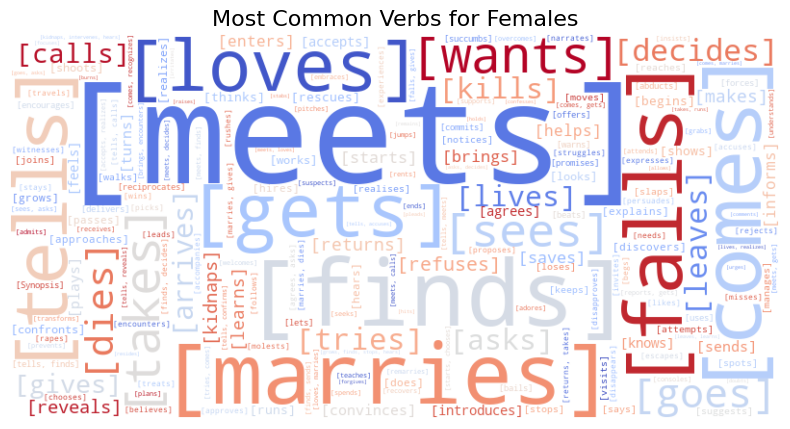

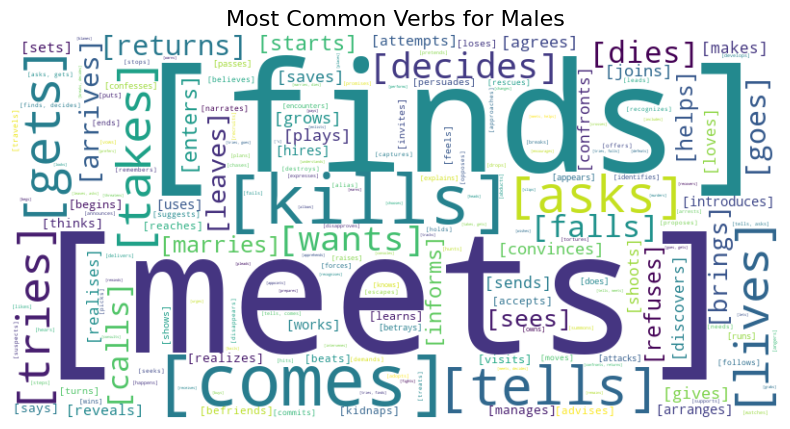

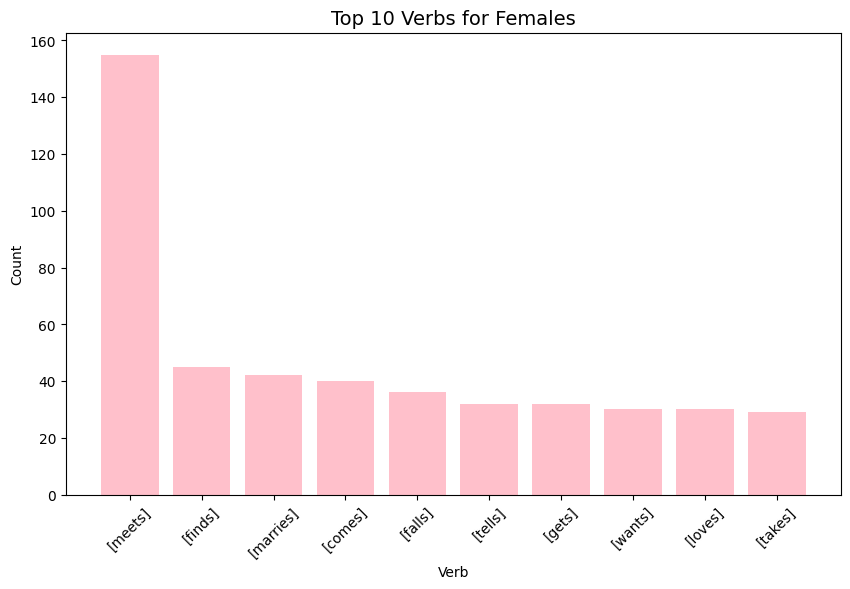

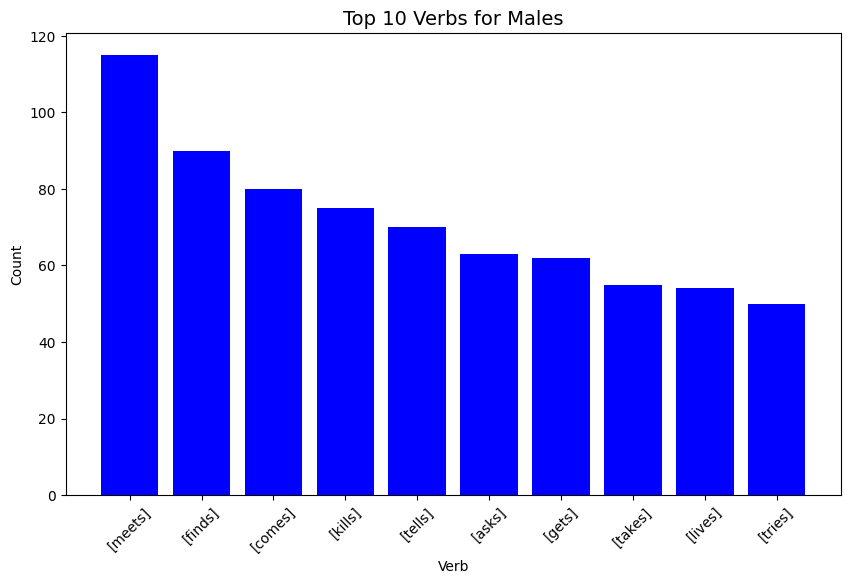

In [54]:
# Count verb frequencies for each gender
female_verb_counts = Counter(female_verbs_flattened)
male_verb_counts = Counter(male_verbs_flattened)

# Convert counts to DataFrame for easier comparison
female_verb_df = pd.DataFrame(female_verb_counts.items(), columns=['Verb', 'Count']).sort_values(by='Count', ascending=False)
male_verb_df = pd.DataFrame(male_verb_counts.items(), columns=['Verb', 'Count']).sort_values(by='Count', ascending=False)

# Merge male and female verb counts for comparison
verb_comparison = pd.merge(male_verb_df, female_verb_df, on='Verb', how='outer', suffixes=('_Male', '_Female')).fillna(0)

# Display most common verbs
print("\nTop 10 Verbs for Females:")
print(female_verb_df.head(10))

print("\nTop 10 Verbs for Males:")
print(male_verb_df.head(10))

# Visualize with Word Clouds
def plot_wordcloud(data, title, color, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.savefig(filename)
    plt.show()

plot_wordcloud(female_verb_counts, "Most Common Verbs for Females", 'coolwarm', 'female_verb_worldcloud.png')
plot_wordcloud(male_verb_counts, "Most Common Verbs for Males", 'viridis', 'male_verb_worldcloud.png')

# Visualize with Bar Plots
def plot_top_verbs(data, title, gender_color, filename):
    top_verbs = data.head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_verbs['Verb'], top_verbs['Count'], color=gender_color)
    plt.xlabel('Verb')
    plt.ylabel('Count')
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(filename)
    plt.show()

plot_top_verbs(female_verb_df, "Top 10 Verbs for Females", 'pink', 'female_verb_barplot.png')
plot_top_verbs(male_verb_df, "Top 10 Verbs for Males", 'blue','male_verb_barplot.png')



In [55]:

# Convert verb column to Python lists
# female_data['verb'] = female_data['verb'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])

# Expand the verbs into individual rows
expanded_dataF = female_data.explode('verb').dropna().reset_index(drop=True)
expanded_dataM = male_data.explode('verb').dropna().reset_index(drop=True)

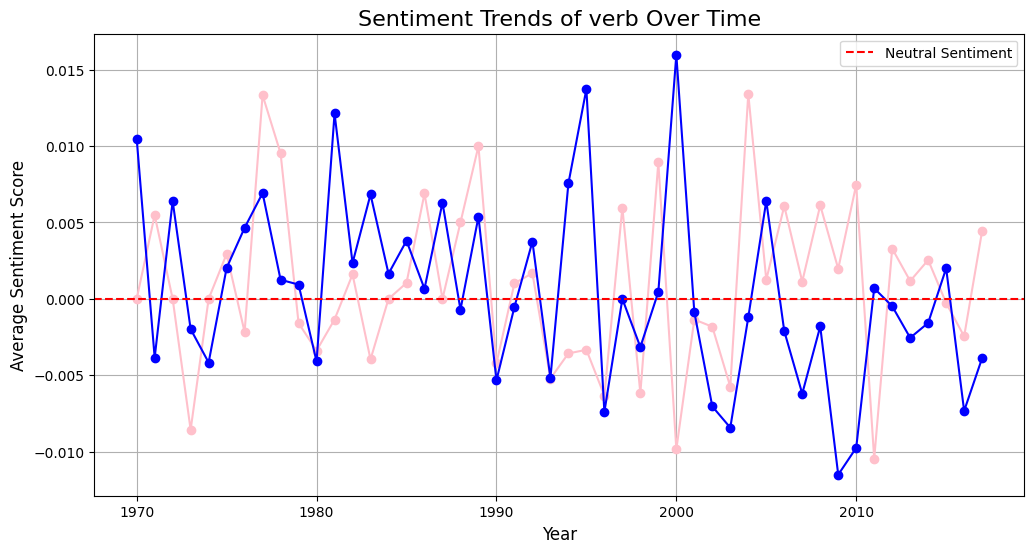

In [56]:
# Perform Sentiment Analysis
def get_sentiment(verb):
    analysis = TextBlob(verb)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and +1 (positive)

expanded_dataF['Sentiment'] = expanded_dataF['verb'].apply(get_sentiment)
expanded_dataM['Sentiment'] = expanded_dataM['verb'].apply(get_sentiment)

# Aggregate sentiment by year
sentiment_by_yearF = expanded_dataF.groupby('year')['Sentiment'].mean().reset_index()
sentiment_by_yearM = expanded_dataM.groupby('year')['Sentiment'].mean().reset_index()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_yearF['year'], sentiment_by_yearF['Sentiment'], marker='o', color='pink')
plt.plot(sentiment_by_yearM['year'], sentiment_by_yearM['Sentiment'], marker='o', color='blue')
plt.title("Sentiment Trends of verb Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.axhline(0, color='red', linestyle='--', label="Neutral Sentiment")
plt.legend()
plt.grid(True)
plt.savefig('verb_sentiment.png')

plt.show()
